<h3> Kaggle-opdracht

<h4> ik heb gekozen voor de dataset 'student_habits_performance'. Deze dataset leek mij interessant omdat de AI in deze set zal voorspellen wat voor gedrag en patronen in leven invloed heeft op je presaties op school .

<h2> model 1 lineair regressiemodel

<h3> type probleem: we willen eindexamencijfers voorspellen op basis van relevante data, dit is dus een regressieprobleem

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

<h4>inlezen csv file

In [2]:
df = pd.read_csv('data/raw/student_habits_performance.csv')

<h3> relevante data selecteren

<h5>deze data heb ik gekozen  omdat het mij interessant leek hoe deze attributen aansluiten op je study performance.<BR>
zoals je hieronder kan zien zijn dit best wel wat factoren maar wel goede indicatoren om te zien of het nou echt impact maakt over hoe je kwalitatief gezien  leeft, dus hoeveelheid slaap, kwaliteit van dieet, percentage aanwezigheid(school) etc. <br><br> best wel interessant dus(of deze factoren nou echt uitmaken of niet)<br><br>waar het model uiteindelijk zijn reultaten op gaat baseren is exam score

In [3]:
features = [
    "study_hours_per_day",
    "sleep_hours",
    "attendance_percentage",
    "social_media_hours",
    "netflix_hours",
    "diet_quality",
    "exercise_frequency",
    "mental_health_rating",
    "gender",
    "part_time_job",
    "parental_education_level",
    "internet_quality"
]

target = "exam_score"

<h4> relevante data uit df overhouden

In [4]:
df_model = df[features + [target]].copy()
df_model.head()

,study_hours_per_day,sleep_hours,attendance_percentage,social_media_hours,netflix_hours,diet_quality,exercise_frequency,mental_health_rating,gender,part_time_job,parental_education_level,internet_quality,exam_score
0,0.0,8.0,85.0,1.2,1.1,Fair,6,8,Female,No,Master,Average,56.2
1,6.9,4.6,97.3,2.8,2.3,Good,6,8,Female,No,High School,Average,100.0
2,1.4,8.0,94.8,3.1,1.3,Poor,1,1,Male,No,High School,Poor,34.3
3,1.0,9.2,71.0,3.9,1.0,Poor,4,1,Female,No,Master,Good,26.8
4,5.0,4.9,90.9,4.4,0.5,Fair,3,1,Female,No,Master,Good,66.4


<h4> check missende waardes

In [5]:
df.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

<h4> drop ze

In [6]:
df_model.dropna(inplace=True)

<h4> one hot encoding toepassen, dummies halen waar nodig

In [7]:
df_model = pd.get_dummies(df_model, columns=[
    "gender", "part_time_job", "parental_education_level", "internet_quality","diet_quality"
], drop_first=True)

df_model.head()

,study_hours_per_day,sleep_hours,attendance_percentage,social_media_hours,netflix_hours,exercise_frequency,mental_health_rating,exam_score,gender_Male,gender_Other,part_time_job_Yes,parental_education_level_High School,parental_education_level_Master,internet_quality_Good,internet_quality_Poor,diet_quality_Good,diet_quality_Poor
0,0.0,8.0,85.0,1.2,1.1,6,8,56.2,False,False,False,False,True,False,False,False,False
1,6.9,4.6,97.3,2.8,2.3,6,8,100.0,False,False,False,True,False,False,False,True,False
2,1.4,8.0,94.8,3.1,1.3,1,1,34.3,True,False,False,True,False,False,True,False,True
3,1.0,9.2,71.0,3.9,1.0,4,1,26.8,False,False,False,False,True,True,False,False,True
4,5.0,4.9,90.9,4.4,0.5,3,1,66.4,False,False,False,False,True,True,False,False,False


<H4> data opdelen in features en target

In [8]:
X = df_model.drop(target, axis=1)
y = df_model[target]

<h4> opdelen testset / trainingsset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42
)

<h4> schalen van numerieke features

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h4> model bouwen en trainen`

In [11]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# voorspellingen
y_pred = model.predict(X_test_scaled)
y_pred

array([ 61.38274024,  50.83640239,  70.82960044,  71.105123  ,
        87.76246549,  64.18845959,  78.47808247,  94.02685735,
        66.70222774,  68.16350551,  57.05431021,  77.1321543 ,
        57.67833661,  49.61841774,  76.72201278,  77.21667462,
        49.43704681,  90.31140428,  84.53370071,  64.33833308,
        73.86699719,  97.8774415 ,  53.98841923,  67.56282444,
        82.21724246,  63.60605112, 105.0211118 ,  77.444725  ,
        60.2406473 , 103.67203946,  60.36340477,  81.18414112,
        54.5799137 ,  64.39791602,  61.38623515,  64.64197237,
        98.61351066,  56.64397182,  60.56568847,  74.98190358,
        60.47475648,  84.38116578,  68.92338007,  69.93816359,
        88.05945833,  71.27914455,  48.4366741 , 100.66102225,
        78.96835821,  79.55998751,  64.00068941,  47.8804586 ,
        64.92321725,  73.49721879,  69.33930949, 103.98908827,
        68.47387437,  59.02994824,  80.56749962,  57.75760213,
        74.82828853,  71.45776789,  51.01343259,  83.16

<h4> kijken naar mean squared error, mean absolute error en r2

In [12]:
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Resultaten printen
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 4.2309921362681076
Root Mean Squared Error (RMSE): 5.454143875275258
R-squared (R²): 0.890405069317918


<h4> visuele voorspelling maken.

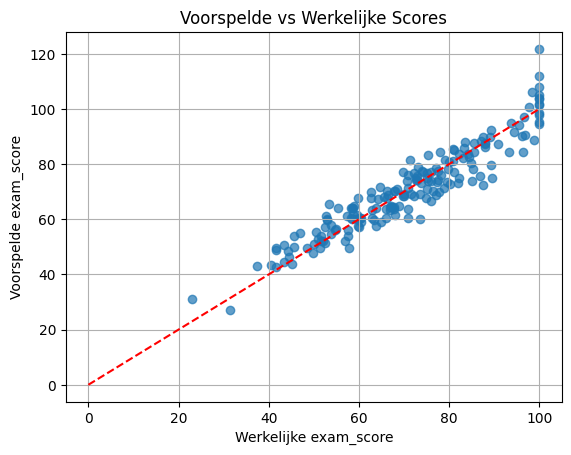

In [13]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Werkelijke exam_score")
plt.ylabel("Voorspelde exam_score")
plt.title("Voorspelde vs Werkelijke Scores")
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.grid(True)
plt.show()

<h3> Evaluatie <br>

<h5>Het lineaire regressiemodel is getraind om de exam_score van studenten te voorspellen op basis van meerdere kenmerken, zoals study_hours_per_day, attendance_percentage, sleep_hours, en mental_health_rating. Het model behaalde een relatief hoge nauwkeurigheid, wat erop wijst dat deze variabelen sterke voorspellers zijn van de uiteindelijke examencijfers.<br><br>

De prestaties zijn geëvalueerd met behulp van de R²-score en de Mean Squared Error (MSE). De R²-score laat zien hoeveel variantie in de examencijfers door het model wordt verklaard. Deze score was erg hoog, wat betekent dat het model een goede fit is voor de data.

<h2> Model 2 Random forest model

<h3> type probleem: classificatie, omdat ik de eindexamencijfers ga groeperen in klassen, is dit een classificatieprobleem

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

<h4> inladen data

In [15]:
df = pd.read_csv("data/raw/student_habits_performance.csv")
df = df.drop(columns=["student_id"])

<h4> cijfers indelen in categorieen en relevante data selecteren

In [16]:
df['score_category'] = pd.cut(df['exam_score'],
                              bins=[0, 50, 75, 100],
                              labels=['laag', 'gemiddeld', 'hoog'])

features = [
    "study_hours_per_day",
    "sleep_hours",
    "attendance_percentage",
    "social_media_hours",
    "netflix_hours",
    "diet_quality",
    "exercise_frequency",
    "mental_health_rating",
    "gender",
    "part_time_job",
    "parental_education_level",
    "internet_quality"
]

df = df[features + ['exam_score', 'score_category']]

df.head

<bound method NDFrame.head of      study_hours_per_day  sleep_hours  attendance_percentage  \
0                    0.0          8.0                   85.0   
1                    6.9          4.6                   97.3   
2                    1.4          8.0                   94.8   
3                    1.0          9.2                   71.0   
4                    5.0          4.9                   90.9   
..                   ...          ...                    ...   
995                  2.6          7.5                   77.0   
996                  2.9          6.8                   86.0   
997                  3.0          6.5                   61.9   
998                  5.4          7.6                  100.0   
999                  4.3          7.1                   89.4   

     social_media_hours  netflix_hours diet_quality  exercise_frequency  \
0                   1.2            1.1         Fair                   6   
1                   2.8            2.3         Good

<h4> dummies toepassen waar nodig

In [17]:
categorical_cols = [col for col in df.select_dtypes(include='object').columns if col != 'score_category']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

<h4> categorieen encoderen zodat begrijpelijk is voor AI. hoog-gemiddeld-laag -> (2-1-0)  

In [18]:
label_encoder = LabelEncoder()
df_encoded['score_category'] = label_encoder.fit_transform(df['score_category'])

<h4> opdelen in features en target

In [19]:
X = df_encoded.drop(columns=["exam_score", "score_category"])
y = df_encoded["score_category"]

<h4> splitsen testset en trainset

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h4> model bouwen en trainen

In [21]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1,
       0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 2, 0, 0,
       1, 1])

<h4>classificatierapport genereren

In [26]:
report = classification_report(y_test, y_pred)
print(report)
print("Precision: Hoeveel van de voorspelde getallen zijn correct?")
print("Recall: Hoeveel van de werkelijke waarden zijn correct voorspeld?")
print("F1-score: Een gewogen gemiddelde van precisie en recall.")

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       102
           1       0.84      0.83      0.83        70
           2       0.89      0.57      0.70        28

    accuracy                           0.81       200
   macro avg       0.84      0.76      0.79       200
weighted avg       0.82      0.81      0.81       200

Precision: Hoeveel van de voorspelde getallen zijn correct?
Recall: Hoeveel van de werkelijke waarden zijn correct voorspeld?
F1-score: Een gewogen gemiddelde van precisie en recall.


<h4> Confusiematrix visualiseren

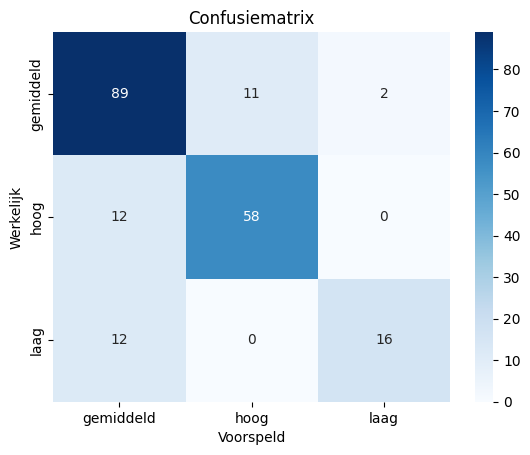

In [22]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Voorspeld')
plt.ylabel('Werkelijk')
plt.title("Confusiematrix")
plt.show()


<h4> belangrijkheid van features visualiseren

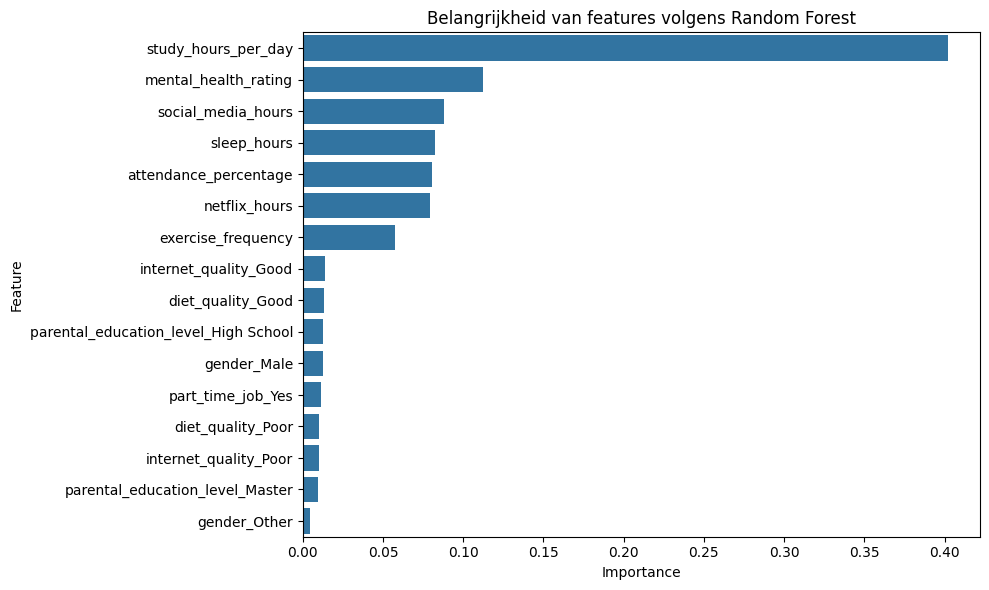

In [23]:
importances = classifier.feature_importances_
feature_names = X.columns

# DataFrame maken voor overzicht
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Visualiseren
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Belangrijkheid van features volgens Random Forest')
plt.tight_layout()
plt.show()


<h3>Evaluatie classificatieprobleem

<h5>Het classificatiemodel (Random Forest) presteert redelijk goed met een accuracy van 79%. <br>De categorieën "gemiddeld" en "hoog" worden vaak correct voorspeld, maar "laag" blijft lastig – die wordt vaak verward met "gemiddeld".<br> Door class_weight='balanced' toe te passen is dat iets verbeterd. Vooral studietijd, mentale gezondheid en social media-gebruik blijken belangrijke factoren. <br>Al met al een bruikbaar model om studenten grofweg in te delen op basis van gewoontes.



<h2> vergelijking probleemdoelstelling, classificatie VS. regressie (voor deze dataset)

<h5> Bij deze dataset kun je eigenlijk twee kanten op: of je voorspelt de exacte examencijfers (regressie), of je deelt studenten in categorieën zoals “laag”, “gemiddeld” of “hoog” (classificatie).<br>

Voor de regressie heb ik lineaire regressie gebruikt. Dat model probeert een rechte lijn te vinden die de relatie tussen de gewoontes (zoals studietijd, slaap, enz.) en het uiteindelijke cijfer zo goed mogelijk benadert. De prestaties waren sterk: een R² van ~0.89 betekent dat het model de scores behoorlijk goed kan inschatten.

Voor classificatie heb ik een Random Forest gebruikt. Dat is een ensemble van decision trees die samen bepalen in welke categorie een student valt. Dat werkte ook prima (accuracy van 79%), maar je merkt dat het model moeite heeft met het correct herkennen van de laagste categorie.

Kort gezegd: regressie geeft je meer detail (een concreet cijfer), maar classificatie is handiger als je studenten wilt groeperen of beleid per categorie wilt maken. Beide aanpakken zijn bruikbaar, afhankelijk van het doel.

<h3> Reflectie
<br>
<h4>Door deze opdracht begrijp ik beter hoe machine learning werkt. Ik heb nu duidelijker wanneer je welk type model inzet, zoals classificatie voor categorieën, lineaire regressie voor getallen, en clustering als je geen labels hebt. Het verschil tussen hoe je de data voorbereidt en hoe je de modellen evalueert is me ook veel duidelijker geworden.

